In [25]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
from transformer.infer import SentenceEmbedder

if __name__ == "__main__":
    # Initialize SentenceEmbedder with the model name
    embedder = SentenceEmbedder("model")

    # Sentences we want sentence embeddings for
    query_sentence = ["xiaomi"]

    # Query sentence
    options = ["Food", "mobile", "cars"]

    # Get most similar sentences to the query sentence
    similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)

    # Print most similar sentences
    print("Most similar sentences to '{}':".format(query_sentence))
    for sentence, similarity in similar_sentences:
        print("- {} (Cosine similarity: {})".format(sentence, similarity))


Most similar sentences to '['xiaomi']':
- mobile (Cosine similarity: 0.47098442912101746)
- cars (Cosine similarity: 0.20617102086544037)
- Food (Cosine similarity: 0.18848836421966553)


In [57]:
from transformer.infer import SentenceEmbedder

if __name__ == "__main__":
    # Initialize SentenceEmbedder with the model name
    embedder = SentenceEmbedder("model")

    # Sentences we want sentence embeddings for
    query_sentence = ["xhamster"]

    # Query sentence
    options = ["animal", "porn", "rabbit",]

    # Get most similar sentences to the query sentence
    similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)

    # Print most similar sentences
    print("Most similar sentences to '{}':".format(query_sentence))
    for sentence, similarity in similar_sentences:
        print("- {} (Cosine similarity: {})".format(sentence, similarity))


Most similar sentences to '['xhamster']':
- porn (Cosine similarity: 0.22827120125293732)
- rabbit (Cosine similarity: 0.22731664776802063)
- animal (Cosine similarity: 0.20361948013305664)


In [75]:
def get_match(domain='youtube',cats=['a','b','c']):
    query_sentence = [domain]

    # Query sentence
    options = cats

    # Get most similar sentences to the query sentence
    similar_sentences = embedder.compare_sentence_embeddings(query_sentence, options)
    return similar_sentences[:5]

In [85]:
get_match(domain='quora',cats=domain_cats)

[('Social Media', 0.39762669801712036),
 ('Porn', 0.3821612596511841),
 ('Search Engines', 0.28037431836128235),
 ('Technology & Software', 0.2530478835105896),
 ('Collaboration & Productivity', 0.22346429526805878)]

In [6]:
embedder = SentenceEmbedder("model")


# Domain names list

In [3]:
with open('domain_names_ChatGPT.txt', 'r') as f:
    domain_names = f.readlines()
    domain_names = [domain.strip() for domain in domain_names]

Category list

In [71]:
with open('domain_names_ChatGPT_categories.txt', 'r') as f:
    domain_cats = f.readlines()
    domain_cats = [domain_cat.strip() for domain_cat in domain_cats]

In [72]:
domain_cats

['Search Engines',
 'Social Media',
 'Streaming Services',
 'Cloud Storage',
 'Online Shopping',
 'Technology & Software',
 'Education & E-Learning',
 'Collaboration & Productivity',
 'Email Services',
 'Blogging & Website Builders',
 'Porn']

In [35]:
embeddings = [] 
for d in domain_names:
    embeddings.append(embedder.get_sentence_embeddings(d).numpy())

In [19]:
df = pd.DataFrame({'Domains':domain_names,'Embeddings':embeddings})

In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


In [36]:
embeddings = np.concatenate(embeddings)

In [37]:
# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(embeddings)

C:\Users\SafyanMemon\anaconda3\envs\hugging_face\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SafyanMemon\anaconda3\envs\hugging_face\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


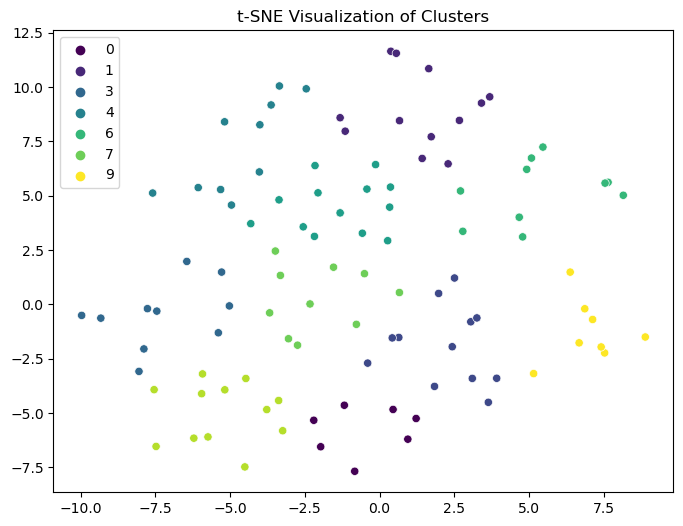

In [58]:
# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(data_tsne)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=clusters, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [59]:
df['Clusters'] = clusters

In [60]:
df

,Domains,Embeddings,cluster,Clusters
0,google,"[[-0.04219752, -0.013702542, -0.0034124518, 0....",5,5
1,kzhi,"[[-0.058460146, -0.00872801, -0.046693746, -0....",3,3
2,zemanta,"[[-0.052519664, 0.1108933, -0.08358834, 0.0056...",8,8
3,shalltry,"[[0.0018934481, 0.049511734, -0.01593517, -0.0...",0,0
4,tiktokcdn,"[[-0.15029801, 0.016115353, -0.05503337, -0.05...",8,8
...,...,...,...,...
101,brazzers,"[[-0.050659943, -0.010195114, -0.020236144, 0....",3,3
102,xnxx,"[[-0.05906182, -0.057904776, 0.020419588, -0.0...",9,9
103,runbox,"[[0.097997375, 0.012551945, -0.008453739, 0.03...",6,6
104,posteo,"[[-0.0751486, 0.045807354, -0.032929998, -0.03...",7,7


In [64]:
df.groupby('Clusters').apply(lambda x: x['Domains']).to_csv('categories.csv')